# Import Packages

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('default')
import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)
from morpheus.classifier import Classifier
from morpheus.data import example
%matplotlib inline
import pickle

2022-12-01 12:44:31.543939: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-12-01 12:44:31.543998: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-12-01 12:44:31.596353: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-12-01 12:44:32.568183: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2022-12-01 12:44:32.568318: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: ca

# Import Catalogs

In [7]:
from astropy.table import Table
catdat_f277w = Table.read('/data/jip/2nd_TASK/Morpheus_Trying/JWST_cutout_img_analysis/img/jw01345-o002_t022_nircam_clear-f277w_cat.ecsv', format='ascii.ecsv')

In [8]:
catdat_f277w

label,xcentroid,ycentroid,sky_centroid,aper_bkg_flux,aper_bkg_flux_err,aper30_flux,aper30_flux_err,aper50_flux,aper50_flux_err,aper70_flux,aper70_flux_err,aper_total_flux,aper_total_flux_err,aper30_abmag,aper30_abmag_err,aper50_abmag,aper50_abmag_err,aper70_abmag,aper70_abmag_err,aper_total_abmag,aper_total_abmag_err,aper30_vegamag,aper30_vegamag_err,aper50_vegamag,aper50_vegamag_err,aper70_vegamag,aper70_vegamag_err,aper_total_vegamag,aper_total_vegamag_err,CI_50_30,CI_70_50,CI_70_30,is_extended,sharpness,roundness,nn_label,nn_dist,isophotal_flux,isophotal_flux_err,isophotal_abmag,isophotal_abmag_err,isophotal_vegamag,isophotal_vegamag_err,isophotal_area,semimajor_sigma,semiminor_sigma,ellipticity,orientation,sky_orientation,sky_bbox_ll,sky_bbox_ul,sky_bbox_lr,sky_bbox_ur
,,,"deg,deg",Jy,Jy,Jy,Jy,Jy,Jy,Jy,Jy,Jy,Jy,,,,,,,,,,,,,,,,,,,,,,,,pix,Jy,Jy,,,,,pix2,pix,pix,,deg,deg,"deg,deg","deg,deg","deg,deg","deg,deg"
int64,float64,float64,SkyCoord,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,bool,float64,float32,int64,float64,float64,float32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,SkyCoord,SkyCoord,SkyCoord,SkyCoord
1,1867.7777,14.8373,"214.86144094296085,52.91858895768312",1.850209e-09,6.260100e-11,1.452663e-10,5.586605e-10,4.733271e-10,8.419646e-10,5.955242e-09,2.019061e-09,8.692271e-09,2.947021e-09,33.494588,1.713407,32.212097,1.109652,29.462751,0.316983,29.052167,0.316983,31.179168,1.713407,29.896677,1.109652,27.147332,0.316983,26.736747,0.316983,3.2583,12.5817,40.9954,True,0.504627,-0.452469,49,70.806422,9.732397e-07,1.210630e-08,23.929450,0.013422,21.614031,0.013422,734.0,9.142266,6.550381,0.283506,-29.730174,190.928630,"214.8607891068967,52.91843557627728","214.86160403887365,52.91801395291152","214.86160177270918,52.91900662412824","214.86241670752494,52.91858499520356"
2,1967.4859,4.8814,"214.86310612588167,52.92002653552198",3.471569e-10,6.784242e-11,1.152981e-09,5.872312e-10,2.509031e-09,9.281894e-10,1.040372e-08,2.072806e-09,1.518527e-08,3.025468e-09,31.245445,0.446950,30.401235,0.341753,28.857028,0.197263,28.446444,0.197263,28.930025,0.446950,28.085815,0.341753,26.541608,0.197263,26.131024,0.197263,2.1761,4.1465,9.0233,True,0.435905,-0.671058,39,44.863032,3.350423e-08,2.841543e-09,27.587251,0.088386,25.271831,0.088386,26.0,2.487327,0.892348,0.641242,3.317096,223.975899,"214.86298146375987,52.91997606476545","214.86309159166453,52.91991908693441","214.86317046734567,52.9201088636087","214.86328059533952,52.920051885602945"
3,2069.4761,16.4392,"214.86528840460505,52.92124922517951",2.444899e-09,3.363636e-10,1.501096e-08,1.010947e-09,3.358024e-08,1.500175e-09,1.148408e-07,2.891438e-09,1.676216e-07,4.220343e-09,28.458979,0.070764,27.584791,0.047452,26.249760,0.026998,25.839175,0.026998,26.143559,0.070764,25.269371,0.047452,23.934340,0.026998,23.523755,0.026998,2.2370,3.4199,7.6505,True,0.643553,0.228512,14,24.056744,6.375587e-07,7.966564e-09,24.388700,0.013483,22.073280,0.013483,206.0,5.631685,2.015714,0.642076,-85.012609,135.646195,"214.8649093547381,52.92133059889987","214.86554809782737,52.921000115726166","214.86517397664056,52.92151651291513","214.86581272045368,52.921186028322815"
4,1718.7967,8.9270,"214.8584952719831,52.91667778180228",1.464973e-09,1.649518e-10,1.324874e-09,5.678618e-10,2.947669e-09,8.534683e-10,1.420996e-08,2.044011e-09,2.074085e-08,2.983439e-09,31.094564,0.387289,30.226303,0.276087,28.518518,0.145917,28.107933,0.145917,28.779144,0.387289,27.910883,0.276087,26.203098,0.145917,25.792514,0.145917,2.2249,4.8207,10.7255,True,0.255844,-0.263490,49,108.862463,3.012904e-07,6.666385e-09,25.202537,0.023761,22.887117,0.023761,169.0,4.124814,3.262963,0.208943,12.291053,232.949856,"214.85816539186686,52.91656491766149","214.85847374271162,52.91640539194311","214.8585811360287,52.91685709

# Getting Data H,J,V,z

F160W (H) / F125W (J) / F606W (V) / F850LP (z)

In [10]:
from astropy.io import fits
from astropy.utils.data import get_pkg_data_filename
f115w_nircam_i2d = (get_pkg_data_filename('/data/jip/2nd_TASK/Morpheus_Trying/JWST_cutout_img_analysis/img/jw01345-o002_t022_nircam_clear-f115w_i2d.fits'))
f150w_nircam_i2d = (get_pkg_data_filename('/data/jip/2nd_TASK/Morpheus_Trying/JWST_cutout_img_analysis/img/jw01345-o002_t022_nircam_clear-f150w_i2d.fits'))
f200w_nircam_i2d = (get_pkg_data_filename('/data/jip/2nd_TASK/Morpheus_Trying/JWST_cutout_img_analysis/img/jw01345-o002_t022_nircam_clear-f200w_i2d.fits'))
f277w_nircam_i2d = (get_pkg_data_filename('/data/jip/2nd_TASK/Morpheus_Trying/JWST_cutout_img_analysis/img/jw01345-o002_t022_nircam_clear-f277w_i2d.fits'))
f356w_nircam_i2d = (get_pkg_data_filename('/data/jip/2nd_TASK/Morpheus_Trying/JWST_cutout_img_analysis/img/jw01345-o002_t022_nircam_clear-f356w_i2d.fits'))
f410m_nircam_i2d = (get_pkg_data_filename('/data/jip/2nd_TASK/Morpheus_Trying/JWST_cutout_img_analysis/img/jw01345-o002_t022_nircam_clear-f410m_i2d.fits'))
f444w_nircam_i2d = (get_pkg_data_filename('/data/jip/2nd_TASK/Morpheus_Trying/JWST_cutout_img_analysis/img/jw01345-o002_t022_nircam_clear-f444w_i2d.fits'))

h, j, v, z = f277w_nircam_i2d, f356w_nircam_i2d, f410m_nircam_i2d, f444w_nircam_i2d

# fits 특성에 따라서 ext 바꿔줘야 
hdat = fits.getdata(h, ext=1)
jdat = fits.getdata(j, ext=1)
vdat = fits.getdata(v, ext=1)
zdat = fits.getdata(z, ext=1)

h_header = fits.getheader(h, ext=1)
j_header = fits.getheader(j, ext=1)
v_header = fits.getheader(v, ext=1)
z_header = fits.getheader(z, ext=1)

# Raw Image Show

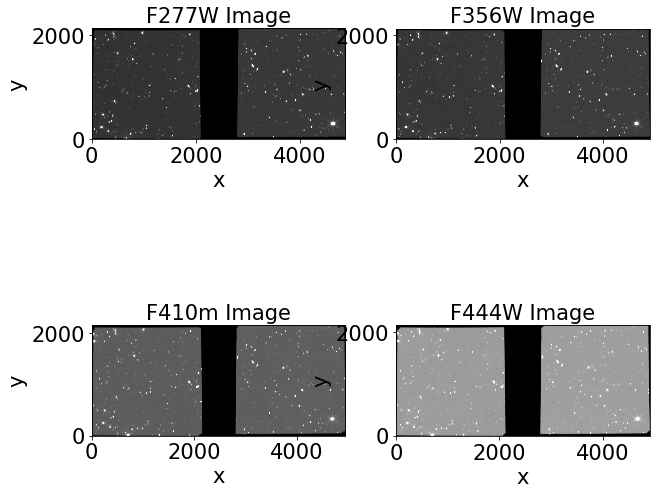

In [39]:
f, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,10))
axes = np.array(axes).flatten()
for ax, arr, band in zip(axes, [hdat, jdat, vdat, zdat], ['F277W', 'F356W', 'F410m', 'F444W']):
    ax.set_title(f'{band} Image', fontsize=21)
    ax.imshow(arr, origin='lower', cmap='gray',  vmin=0, vmax=0.38)
    # ax.plot(catdat_f277w['xcentroid'], catdat_f277w['ycentroid'], 'o', color='yellow', ms=2)
    ax.set_xlabel('x', fontsize=21)
    ax.set_ylabel('y', fontsize=21)
    ax.tick_params(axis='x', labelsize=21)
    ax.tick_params(axis='y', labelsize=21)

# Image Cut and Show 

## 1) Given X Y ==> Cut the image


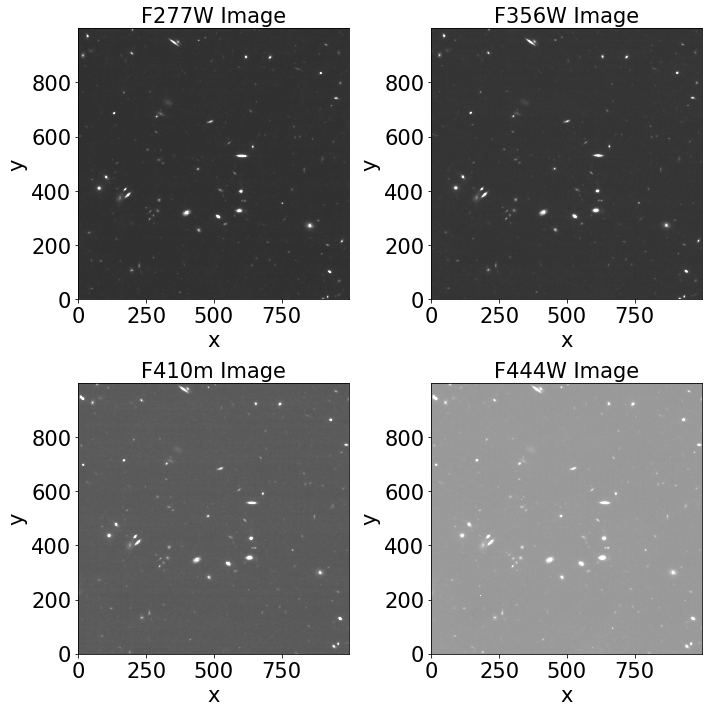

In [24]:

from astropy.nddata import Cutout2D
from astropy import units as u
cutoutposition = (1000, 1000)
cutoutsize = (1000, 1000)
hcut = Cutout2D(hdat, cutoutposition, cutoutsize).data
jcut = Cutout2D(jdat, cutoutposition, cutoutsize).data
vcut = Cutout2D(vdat, cutoutposition, cutoutsize).data
zcut = Cutout2D(zdat, cutoutposition, cutoutsize).data

f, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,10))
axes = np.array(axes).flatten()
for ax, arr, band in zip(axes, [hcut,jcut,vcut,zcut], ['F277W', 'F356W', 'F410m', 'F444W']):
    ax.set_title(f'{band} Image', fontsize=21)
    ax.imshow(arr, origin='lower', cmap='gray',  vmin=0, vmax=0.3853037)
    ax.set_xlabel('x', fontsize=21)
    ax.set_ylabel('y', fontsize=21)
    ax.tick_params(axis='x', labelsize=21)
    ax.tick_params(axis='y', labelsize=21)

plt.tight_layout()
plt.show()


## Comparing Catalog Source and image

In [40]:
catdat_f277w.info

<Table length=2236>
         name           dtype    unit  format                                                                  description                                                                    class   n_bad
---------------------- ------- ------- ------ ---------------------------------------------------------------------------------------------------------------------------------------------- -------- -----
                 label   int64                                                                                                                     Unique source identification label number   Column     0
             xcentroid float64            .4f                                                                                                           X pixel value of the source centroid   Column     0
             ycentroid float64            .4f                                                                                                           Y pixel valu

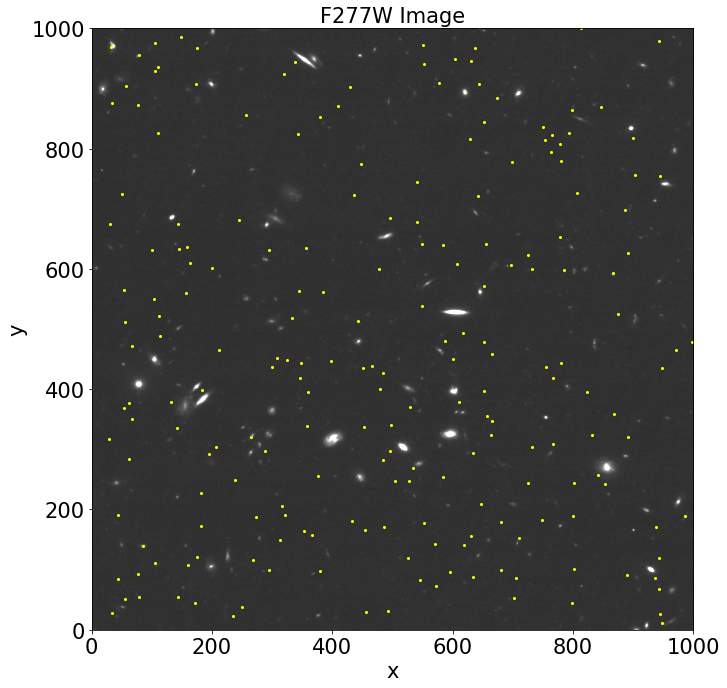

In [36]:
f, axes = plt.subplots(nrows=1, ncols=1, figsize=(10,10))
axes = np.array(axes).flatten()
for ax, arr, band in zip(axes, [hcut], ['F277W']): #,jcut,vcut,zcut],['F277W', 'F356W', 'F410m', 'F444W']):
    ax.set_title(f'{band} Image', fontsize=21)
    ax.imshow(arr, origin='lower', cmap='gray',  vmin=0, vmax=0.3853037)
    ax.plot(catdat_f277w['xcentroid'], catdat_f277w['ycentroid'], 'o', color='yellow', ms=2)
    ax.set_xlabel('x', fontsize=21)
    ax.set_ylabel('y', fontsize=21)
    ax.set_xlim(0, 1000)
    ax.set_ylim(0, 1000)
    ax.tick_params(axis='x', labelsize=21)
    ax.tick_params(axis='y', labelsize=21)

plt.tight_layout()
plt.show()


# Cutout near single sources

In [54]:
from astropy.nddata import Cutout2D
from astropy import units as u
from astropy.wcs.utils import pixel_to_skycoord
from astropy.wcs.utils import skycoord_to_pixel
from astropy.wcs import WCS
from astropy.coordinates import SkyCoord
from astropy.nddata import Cutout2D
from astropy import units as u


Set DATE-AVG to '2022-06-21T23:30:42.583' from MJD-AVG.
Set DATE-END to '2022-06-22T00:03:43.515' from MJD-END'. [astropy.wcs.wcs]
Set OBSGEO-B to   -36.785729 from OBSGEO-[XYZ].
Set OBSGEO-H to 1725461621.089 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set DATE-AVG to '2022-06-22T00:41:54.035' from MJD-AVG.
Set DATE-END to '2022-06-22T01:14:35.286' from MJD-END'. [astropy.wcs.wcs]
Set OBSGEO-B to   -36.795264 from OBSGEO-[XYZ].
Set OBSGEO-H to 1725510974.395 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set DATE-AVG to '2022-06-22T00:41:54.035' from MJD-AVG.
Set DATE-END to '2022-06-22T01:14:35.286' from MJD-END'. [astropy.wcs.wcs]
Set OBSGEO-B to   -36.795264 from OBSGEO-[XYZ].
Set OBSGEO-H to 1725510974.395 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set DATE-AVG to '2022-06-22T01:53:47.550' from MJD-AVG.
Set DATE-END to '2022-06-22T02:27:14.386' from MJD-END'. [astropy.wcs.wcs]
Set OBSGEO-B to   -36.800090 from OBSGEO-[XYZ].
Set OBSGEO-H to 1725535860.995 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set DATE

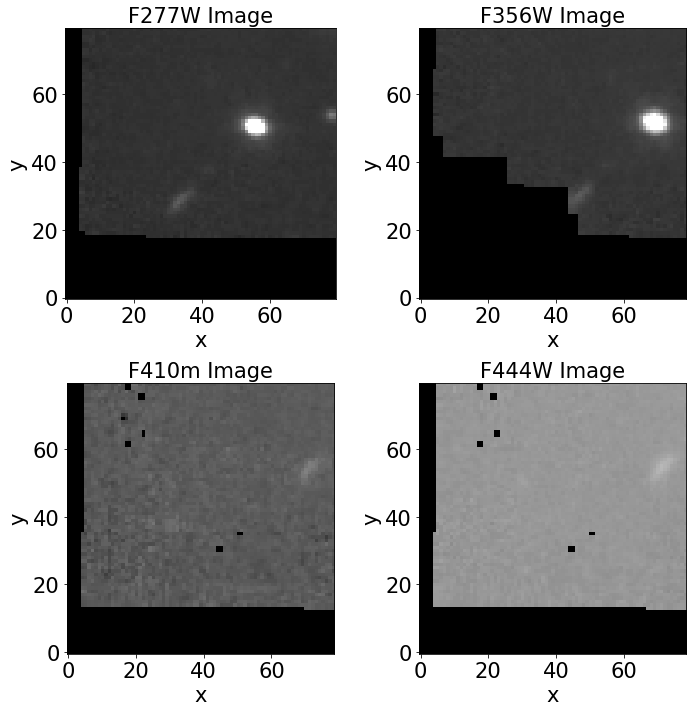

In [78]:
def catalog_to_cutoutposition(i, wcs_header):
    wcs = WCS(wcs_header) #wcs = WCS(h_header)
    sky_bbox_ll = skycoord_to_pixel(catdat_f277w['sky_bbox_ll'][i], wcs)
    sky_bbox_ul = skycoord_to_pixel(catdat_f277w['sky_bbox_ul'][i], wcs)
    sky_bbox_lr = skycoord_to_pixel(catdat_f277w['sky_bbox_lr'][i], wcs)
    sky_bbox_ur = skycoord_to_pixel(catdat_f277w['sky_bbox_ur'][i], wcs)

    ymin, ymax = sky_bbox_ll[1], sky_bbox_ur[1]
    xmin, xmax = sky_bbox_ll[0], sky_bbox_ur[0]

    cutoutposition = (0.5*(xmax-xmin), 0.5*(ymax-ymin))
    cutoutsize = (xmax-xmin, ymax-ymin)
    return [cutoutposition, 150]

snum=2200

hcut = Cutout2D(hdat, catalog_to_cutoutposition(snum, h_header)[0], catalog_to_cutoutposition(snum, h_header)[1]).data
jcut = Cutout2D(jdat, catalog_to_cutoutposition(snum, j_header)[0], catalog_to_cutoutposition(snum, j_header)[1]).data
vcut = Cutout2D(vdat, catalog_to_cutoutposition(snum, v_header)[0], catalog_to_cutoutposition(snum, v_header)[1]).data
zcut = Cutout2D(zdat, catalog_to_cutoutposition(snum, z_header)[0], catalog_to_cutoutposition(snum, z_header)[1]).data

f, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,10))
axes = np.array(axes).flatten()
for ax, arr, band in zip(axes, [hcut,jcut,vcut,zcut], ['F277W', 'F356W', 'F410m', 'F444W']):
    ax.set_title(f'{band} Image', fontsize=21)
    ax.imshow(arr, origin='lower', cmap='gray',  vmin=0, vmax=0.3853037)
    ax.set_xlabel('x', fontsize=21)
    ax.set_ylabel('y', fontsize=21)
    ax.tick_params(axis='x', labelsize=21)
    ax.tick_params(axis='y', labelsize=21)

plt.tight_layout()
plt.show()




# Running Morpheus

In [18]:
classified = Classifier.classify(h=hcut, j=jcut, v=vcut, z=zcut)



# the mask tells the segmentation mapping algorithm to ignore
# the areas unclassified as a result of the windowing classification
# method used.
mask = np.zeros_like(hcut, np.int)
mask[5:-5, 5:-5] = 1
segmap = Classifier.segmap_from_classified(classified, hcut, mask=mask)

catalog = Classifier.catalog_from_classified(classified, hcut, segmap)

rgb = Classifier.colorize_classified(classified)


classifying:   0%|          | 0/923 [00:00<?, ?batch/s]/home/jip/anaconda3/lib/python3.9/site-packages/morpheus/core/unet.py:143: UserWarning: `tf.layers.batch_normalization` is deprecated and will be removed in a future version. Please use `tf.keras.layers.BatchNormalization` instead. In particular, `tf.control_dependencies(tf.GraphKeys.UPDATE_OPS)` should not be used (consult the `tf.keras.layers.BatchNormalization` documentation).
  return LAYERS.batch_normalization(inputs, training=is_training, axis=axis)
/home/jip/anaconda3/lib/python3.9/site-packages/morpheus/core/unet.py:162: UserWarning: `tf.layers.conv2d` is deprecated and will be removed in a future version. Please Use `tf.keras.layers.Conv2D` instead.
  inputs = LAYERS.conv2d(
/home/jip/anaconda3/lib/python3.9/site-packages/morpheus/core/unet.py:149: UserWarning: `tf.layers.dropout` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dropout` instead.
  return LAYERS.dropout(inputs, rate=rate)


Building Markers...
Watershedding...


100%|██████████| 1000/1000 [00:01<00:00, 569.11it/s]


# Saving Morpheus Classified Result to Pickle

Once calculation is done to here, don't need to calculate again.

In [21]:
# save with it 
with open("classified_result.pickle","wb") as f:
    pickle.dump(classified, f)

In [2]:
# load with it
with open("classified_result.pickle","rb") as fi:
    classified = pickle.load(fi)

# Colorizing Result

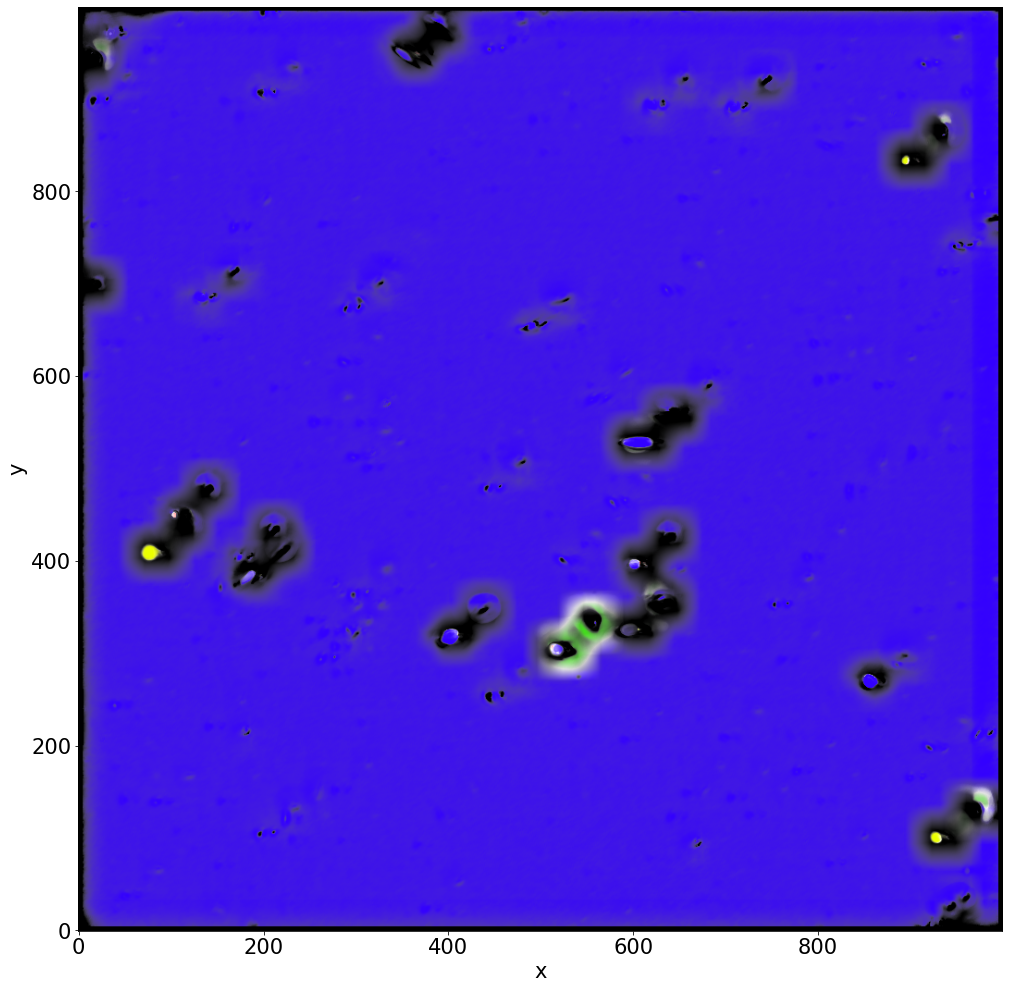

In [5]:
plt.figure(figsize=(17, 17))
plt.xlabel('x', fontsize=21)
plt.ylabel('y', fontsize=21)
plt.xticks(fontsize=21)
plt.yticks(fontsize=21)
plt.imshow(rgb, origin='lower')
plt.show()

# Saving Result to Dataframe, CSV

In [23]:
from astropy.wcs.utils import pixel_to_skycoord
from astropy.wcs import WCS

wcs = WCS(h_header)

morpheus_result = pd.DataFrame(catalog)
morpheus_result['ra'] = pd.Series(dtype='float')
morpheus_result['dec'] = pd.Series(dtype='float')
morpheus_result['x'] = pd.Series(dtype='float')
morpheus_result['y'] = pd.Series(dtype='float')
morpheus_result['p_sph'] = pd.Series(dtype='float')
morpheus_result['p_disk'] = pd.Series(dtype='float')
morpheus_result['p_irr'] = pd.Series(dtype='float')
morpheus_result['p_ps'] = pd.Series(dtype='float')

for i in range(np.size(morpheus_result['ra'])):
    morpheus_result['x'][i] = morpheus_result['location'][i][1]
    morpheus_result['y'][i] = morpheus_result['location'][i][0]
    morpheus_result['p_sph'][i] = morpheus_result['morphology'][i][0]
    morpheus_result['p_disk'][i] = morpheus_result['morphology'][i][1]
    morpheus_result['p_irr'][i] = morpheus_result['morphology'][i][2]
    morpheus_result['p_ps'][i] = morpheus_result['morphology'][i][3]
   
morpheus_result['real_x'] = morpheus_result['x']+(cutoutposition[0]-cutoutsize[0]/2)
morpheus_result['real_y'] = morpheus_result['y']+(cutoutposition[1]-cutoutsize[1]/2)

for i in range(np.size(morpheus_result['ra'])):
    morpheus_result['ra'][i] = pixel_to_skycoord(morpheus_result['real_x'][i], morpheus_result['real_y'][i], wcs).ra.degree
    morpheus_result['dec'][i] = pixel_to_skycoord(morpheus_result['real_x'][i], morpheus_result['real_y'][i], wcs).dec.degree


Set DATE-AVG to '2022-06-21T23:30:42.583' from MJD-AVG.
Set DATE-END to '2022-06-22T00:03:43.515' from MJD-END'. [astropy.wcs.wcs]
Set OBSGEO-B to   -36.785729 from OBSGEO-[XYZ].
Set OBSGEO-H to 1725461621.089 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
/tmp/ipykernel_8177/2421671279.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  morpheus_result['x'][i] = morpheus_result['location'][i][1]
/tmp/ipykernel_8177/2421671279.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  morpheus_result['y'][i] = morpheus_result['location'][i][0]
/tmp/ipykernel_8177/2421671279.py:19: SettingWithCopyWarning: 
A value is trying to be set

In [24]:
import os 
# os.makedirs("./output")
morpheus_result.to_csv("./morpheus_result.csv")

# Filtering High-Probabilithy Disk Candidates

In [25]:
datmor = pd.DataFrame(pd.read_csv("morpheus_result.csv"))
datmor_highdisk=datmor.loc[datmor['p_disk'] > 0.5]
datmor_highdisk

,Unnamed: 0,id,location,morphology,ra,dec,x,y,p_sph,p_disk,p_irr,p_ps,real_x,real_y
0,0,4,"[304, 517]","[0.004214043399937225, 0.9745820631016608, 0.0...",214.862743,52.898298,517.0,304.0,4.214043e-03,0.974582,1.886219e-02,2.341703e-03,1017.0,804.0
1,1,5,"[408, 78]","[0.0012955463222598617, 0.9025014887019072, 0....",214.856740,52.891283,78.0,408.0,1.295546e-03,0.902501,8.731635e-04,9.532980e-02,578.0,908.0
2,2,6,"[101, 928]","[0.0018090313608277188, 0.9656217115435171, 0....",214.866039,52.906069,928.0,101.0,1.809031e-03,0.965622,3.729508e-03,2.883975e-02,1428.0,601.0
3,3,7,"[528, 604]","[0.00047018126190971225, 0.9971817918259157, 0...",214.869317,52.896900,604.0,528.0,4.701813e-04,0.997182,2.236484e-03,1.115433e-04,1104.0,1028.0
4,4,8,"[396, 601]","[0.057353506713164845, 0.8984933610714578, 0.0...",214.866355,52.898365,601.0,396.0,5.735351e-02,0.898493,2.546363e-02,1.868950e-02,1101.0,896.0
5,5,9,"[449, 104]","[0.0419140120102371, 0.9538990400694616, 0.004...",214.858134,52.891161,104.0,449.0,4.191401e-02,0.953899,4.067558e-03,1.193895e-04,604.0,949.0
6,6,10,"[969, 36]","[0.0021848107848884946, 0.9832647873252558, 0....",214.868294,52.884332,36.0,969.0,2.184811e-03,0.983265,1.420346e-02,3.469460e-04,536.0,1469.0
7,7,11,"[404, 174]","[0.00020002360984208354, 0.9993222953544625, 6...",214.858465,52.892603,174.0,404.0,2.000236e-04,0.999322,6.249075e-06,4.714320e-04,674.0,904.0
8,8,12,"[270, 855]","[0.00017900738165674694, 0.9998208253053665, 1...",214.868380,52.903174,855.0,270.0,1.790074e-04,0.999821,1.178812e-07,4.943177e-08,1355.0,770.0
9,9,13,"[891, 708]","[8.452255872097873e-05, 0.9999154774412791, 0....",214.879272,52.894144,708.0,891.0,8.452256e-05,0.999915,0.000000e+00,0.000000e+00,1208.0,1391.0


# Plotting detected sources on image and colormap

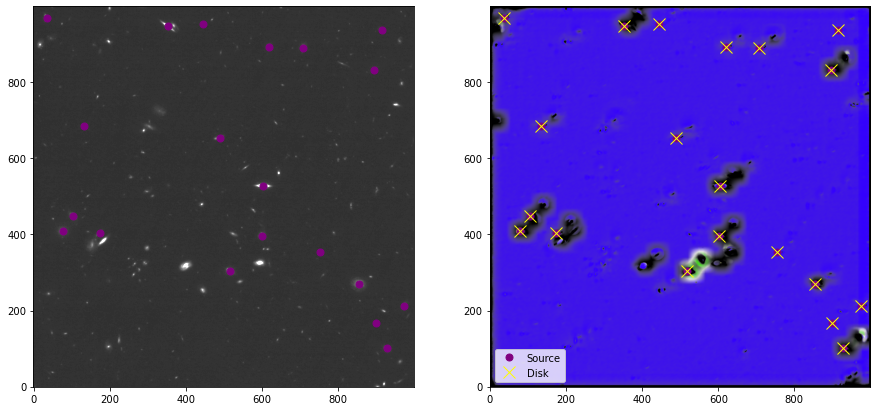

In [26]:
fig, axs = plt.subplots(1, 2, figsize=(15,15))
axs[0].imshow(hcut, origin='lower', cmap='gray',  vmin=0, vmax=0.38)
axs[0].plot(datmor['x'], datmor['y'], 'o', ms=7, color='purple')
axs[1].imshow(rgb, origin='lower')
axs[1].plot(datmor['x'], datmor['y'], 'o', ms=7, color='purple', label='Source')
axs[1].plot(datmor_highdisk['x'], datmor_highdisk['y'], 'x', ms=12, color='yellow', label='Disk')
axs[1].legend()


Red = Spheroid <br>
Blue = Disk <br>
Green = Irregular <br>
Yellow = Point Source (compact) <br>
Back = Background <br>
White = Can't Classify (two class prob is so similar) <br>